                                                                                                        Aradhya Mathur

DSC 275/475: Time Series Analysis and Forecasting (Fall 2022) 
HW #3 (Total points: 50)

Instructions/Suggestions: 
•	For this homework, you can use external libraries/functions to implement the time-series models. 
•	For R users, 
o	Recommend using the “Arima” function in the “forecast” package (https://www.rdocumentation.org/packages/forecast/versions/8.13/topics/Arima). In this function, set “include.constant” to be TRUE to match the standard equation for ARIMA we are using in the lectures. 
•	 For Python users, 
o	For Q1 and Q2: 
	Use the “ARIMA” function from “statsmodels.tsa.arima_model”. Use the “summary” method to obtain the model parameters. You may get a warning message about deprecation when using “ARIMA” from this package but that is OK and you can ignore that.  
o	For Q2, you can use the predict method after fitting the ARIMA model to obtain the model output values. Make sure to specify the argument typ='level' when using this function.


1.	The data provided in the file Measurement_Q1.xls exhibits a linear trend. Apply the following models to the data. (20 pts)

a)	Develop an IMA(1,1) model for the data. Display the model parameters obtained as your output (8 pts)
b)	Compute and plot the first difference of the data. (2 pts)
c)	Now, develop an MA(1) model on the first difference. Display the model parameters obtained as your output (8 pts)
d)	Based on the model parameters you obtained in (a) and (c), comment on how the two models are related. (2 pts)


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.tools import diff
import warnings
import statsmodels.graphics.tsaplots as tsa
warnings.filterwarnings("ignore")

In [68]:
measureQ1 = pd.read_csv('Measurement_Q1.csv')

In [69]:
measureQ1.head()

,Time,Measurement
0,1,1.84
1,2,3.93
2,3,4.00
3,4,5.42
4,5,6.89


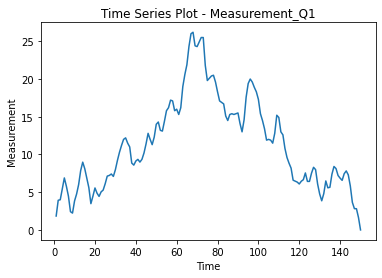

In [70]:
#Time Series Plot 
plt.title('Time Series Plot - Measurement_Q1')
plt.plot(measureQ1.Time, measureQ1.Measurement)
plt.xlabel('Time')
plt.ylabel('Measurement')
plt.show()


In [71]:
# a) Develop an IMA(1,1) model for the data. 
ima_11 = ARIMA(measureQ1.Measurement, order=(0,1,1))
ima_11fit = ima_11.fit()
ima_11fit

In [72]:
#Display the model parameters obtained as your output (8 pts)
ima_11fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Measurement   No. Observations:                  150
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -202.609
Date:                Thu, 13 Oct 2022   AIC                            409.217
Time:                        19:12:19   BIC                            415.225
Sample:                             0   HQIC                           411.658
                                - 150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7531      0.060     12.573      0.000       0.636       0.871
sigma2         0.8834      0.109      8.080      0.000       0.669       1.098
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 1.10
Prob(Q):                              0.61   Prob(JB):                         0.58
Heteroskedasticity (H):               1.00   Skew:                            -0.21
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
# b)Compute and plot the first difference of the data. (2 pts)
firstdiff = diff(measureQ1.Measurement)
firstdiff

1      2.09
2      0.07
3      1.42
4      1.47
5     -1.10
       ... 
145   -2.17
146   -0.83
147   -0.01
148   -1.17
149   -1.64
Name: Measurement, Length: 149, dtype: float64

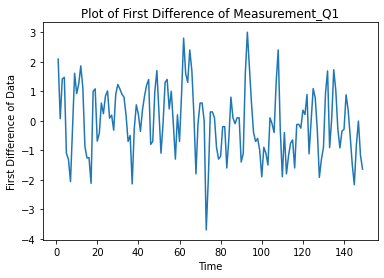

In [74]:
#Time Series Plot for first difference 
plt.title('Plot of First Difference of Measurement_Q1')
plt.plot(firstdiff)
plt.xlabel('Time')
plt.ylabel('First Difference of Data')
plt.show()


In [75]:
#c) Now, develop an MA(1) model on the first difference. 
#Display the model parameters obtained as your output (8 pts)
ma1 = ARIMA(firstdiff, order=(0,0,1))
ma1_fit = ma1.fit()
ma1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Measurement   No. Observations:                  149
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -202.607
Date:                Thu, 13 Oct 2022   AIC                            411.215
Time:                        19:12:20   BIC                            420.227
Sample:                             0   HQIC                           414.876
                                - 149                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0064      0.137     -0.047      0.962      -0.274       0.261
ma.L1          0.7531      0.061     12.392      0.000       0.634       0.872
sigma2         0.8834      0.110      8.052      0.000       0.668       1.098
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 1.10
Prob(Q):                              0.61   Prob(JB):                         0.58
Heteroskedasticity (H):               0.99   Skew:                            -0.21
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

d) Based on the model parameters you obtained in (a) and (c), comment on how the two models are related. (2 pts)

Answer) Model (a) and model (c) are same. The two procedures involved are 1) First difference 2) MA model. <br>
In model (a) we did both procedures together while in model (c) we did procedure step by step. <br>
Coeff for ma.L1 and sigma2 are same for both and they are:<br> ma.L1 = 0.7521 and sigma2 = 0.8834.

2. Consider the global mean surface air temperature anomaly data provided in GlobalAirTemperature.xls. (15 pts)
a) Apply an IMA(1,1) model to this data. Calculate the SSE by comparing the model output with the data. (6 pts)
b) Now, apply an IMA(1,2) model. Calculate the SSE. (6 pts)
c) Comment whether model (a) or (b) is better suited for this data based on the SSE? (3 pts)


In [76]:
air_temp = pd.read_csv('GlobalAirTemperature.csv')
air_temp.head()

,Year,"Anomaly, C"
0,1880,-0.11
1,1881,-0.13
2,1882,-0.01
3,1883,-0.04
4,1884,-0.42


In [77]:
air_temp.columns = ['Year','Anomaly']
air_temp.head()

,Year,Anomaly
0,1880,-0.11
1,1881,-0.13
2,1882,-0.01
3,1883,-0.04
4,1884,-0.42


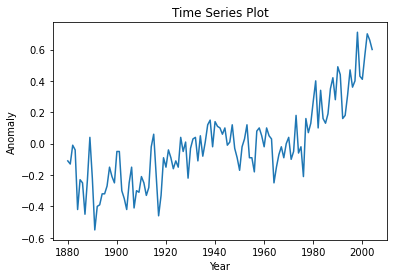

In [78]:
#Time Series Plot for Anomaly vs Year
plt.plot (air_temp.Year, air_temp.Anomaly)
plt.xlabel ('Year')
plt.ylabel ('Anomaly')
plt.title('Time Series Plot')
plt.show()

In [79]:
air_temp

,Year,Anomaly
0,1880,-0.11
1,1881,-0.13
2,1882,-0.01
3,1883,-0.04
4,1884,-0.42
...,...,...
120,2000,0.41
121,2001,0.56
122,2002,0.70
123,2003,0.66


In [80]:
#total length of Anomaly
end_index = len(air_temp.Anomaly)
end_index

125

METHOD 1 - We split train and test data in ratio 60:40

In [81]:
#Spliting into test data and train data gives a float, we convert it to int using int function. 
#(Basically 125*0.6 is 75.0 so after int we get 75)
test_data = air_temp[int(len(air_temp)*0.60):]
train_data = air_temp[:int(len(air_temp)*0.60)]
train_data

,Year,Anomaly
0,1880,-0.11
1,1881,-0.13
2,1882,-0.01
3,1883,-0.04
4,1884,-0.42
...,...,...
70,1950,-0.17
71,1951,-0.02
72,1952,0.03
73,1953,0.12


In [82]:
# a) Apply an IMA(1,1) model to this data.

at_ima11 = ARIMA(train_data.Anomaly, order=(0,1,1))
at_ima11_fit = at_ima11.fit()
at_ima11_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Anomaly   No. Observations:                   75
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  45.008
Date:                Thu, 13 Oct 2022   AIC                            -86.016
Time:                        19:12:21   BIC                            -81.408
Sample:                             0   HQIC                           -84.177
                                 - 75                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7457      0.089     -8.414      0.000      -0.919      -0.572
sigma2         0.0172      0.003      6.484      0.000       0.012       0.022
===================================================================================
Ljung-Box (L1) (Q):                   3.55   Jarque-Bera (JB):                 2.99
Prob(Q):                              0.06   Prob(JB):                         0.22
Heteroskedasticity (H):               0.36   Skew:                            -0.43
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
# Calculate the SSE 
airtemp_pred = at_ima11_fit.predict (start=int(len(air_temp)*0.60), end= end_index-1)
airtemp_pred

75    -0.009709
76    -0.009709
77    -0.009709
78    -0.009709
79    -0.009709
80    -0.009709
81    -0.009709
82    -0.009709
83    -0.009709
84    -0.009709
85    -0.009709
86    -0.009709
87    -0.009709
88    -0.009709
89    -0.009709
90    -0.009709
91    -0.009709
92    -0.009709
93    -0.009709
94    -0.009709
95    -0.009709
96    -0.009709
97    -0.009709
98    -0.009709
99    -0.009709
100   -0.009709
101   -0.009709
102   -0.009709
103   -0.009709
104   -0.009709
105   -0.009709
106   -0.009709
107   -0.009709
108   -0.009709
109   -0.009709
110   -0.009709
111   -0.009709
112   -0.009709
113   -0.009709
114   -0.009709
115   -0.009709
116   -0.009709
117   -0.009709
118   -0.009709
119   -0.009709
120   -0.009709
121   -0.009709
122   -0.009709
123   -0.009709
124   -0.009709
Name: predicted_mean, dtype: float64

In [84]:
SSE = np.sum((air_temp.Anomaly-airtemp_pred)**2)
SSE

4.865956804587791

4.865956804587791 is the SSE

In [85]:
# b) Now, apply an IMA(1,2) model. Calculate the SSE. (6 pts)
at_ima12 = ARIMA(train_data.Anomaly, order=(0,1,2))
at_ima12_fit = at_ima12.fit()
at_ima12_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Anomaly   No. Observations:                   75
Model:                 ARIMA(0, 1, 2)   Log Likelihood                  49.396
Date:                Thu, 13 Oct 2022   AIC                            -92.792
Time:                        19:12:22   BIC                            -85.880
Sample:                             0   HQIC                           -90.035
                                 - 75                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4356      0.140     -3.120      0.002      -0.709      -0.162
ma.L2         -0.3438      0.116     -2.963      0.003      -0.571      -0.116
sigma2         0.0152      0.003      5.271      0.000       0.010       0.021
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.33
Prob(Q):                              0.88   Prob(JB):                         0.31
Heteroskedasticity (H):               0.52   Skew:                            -0.43
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
# Calculate the SSE 
airtemp_pred_12 = at_ima12_fit.predict (start=int(len(air_temp)*0.60), end= end_index-1)
airtemp_pred_12

75    -0.063848
76    -0.011477
77    -0.011477
78    -0.011477
79    -0.011477
80    -0.011477
81    -0.011477
82    -0.011477
83    -0.011477
84    -0.011477
85    -0.011477
86    -0.011477
87    -0.011477
88    -0.011477
89    -0.011477
90    -0.011477
91    -0.011477
92    -0.011477
93    -0.011477
94    -0.011477
95    -0.011477
96    -0.011477
97    -0.011477
98    -0.011477
99    -0.011477
100   -0.011477
101   -0.011477
102   -0.011477
103   -0.011477
104   -0.011477
105   -0.011477
106   -0.011477
107   -0.011477
108   -0.011477
109   -0.011477
110   -0.011477
111   -0.011477
112   -0.011477
113   -0.011477
114   -0.011477
115   -0.011477
116   -0.011477
117   -0.011477
118   -0.011477
119   -0.011477
120   -0.011477
121   -0.011477
122   -0.011477
123   -0.011477
124   -0.011477
Name: predicted_mean, dtype: float64

In [87]:
SSE = np.sum((air_temp.Anomaly-airtemp_pred_12)**2)
SSE

4.8948727088978785

4.8948727088978785 is the SSE

ALTERNATE METHOD (As per the notebook shared in Blackboard)

In [88]:
# a)
# Applying IMA(1,1) 
#Directly on entire dataset
air11 = ARIMA(air_temp.Anomaly, order=(0,1,1))
air11_fit = air11.fit()
air11_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Anomaly   No. Observations:                  125
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  72.910
Date:                Thu, 13 Oct 2022   AIC                           -141.821
Time:                        19:12:23   BIC                           -136.180
Sample:                             0   HQIC                          -139.530
                                - 125                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6640      0.072     -9.243      0.000      -0.805      -0.523
sigma2         0.0180      0.002      8.182      0.000       0.014       0.022
===================================================================================
Ljung-Box (L1) (Q):                   2.36   Jarque-Bera (JB):                 2.20
Prob(Q):                              0.12   Prob(JB):                         0.33
Heteroskedasticity (H):               0.87   Skew:                            -0.29
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
#Using .predict()
air_predict11 = air11_fit.predict (1, end_index, typ = 'levels').rename("Predict11")
SSE1 = np.sum((air_temp.Anomaly-air_predict11)**2)
SSE1

2.2339840521727736

SSE is 2.2339840521727736

In [90]:
# b)
# Applying IMA(1,2) 
air12 = ARIMA(air_temp.Anomaly, order=(0,1,2))
air12_fit = air12.fit()
air12_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Anomaly   No. Observations:                  125
Model:                 ARIMA(0, 1, 2)   Log Likelihood                  76.508
Date:                Thu, 13 Oct 2022   AIC                           -147.016
Time:                        19:12:23   BIC                           -138.555
Sample:                             0   HQIC                          -143.579
                                - 125                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4676      0.099     -4.736      0.000      -0.661      -0.274
ma.L2         -0.2296      0.090     -2.565      0.010      -0.405      -0.054
sigma2         0.0170      0.002      7.631      0.000       0.013       0.021
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 1.18
Prob(Q):                              0.72   Prob(JB):                         0.55
Heteroskedasticity (H):               1.04   Skew:                            -0.23
Prob(H) (two-sided):                  0.91   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
#Using .predict()
air_predict12 = air12_fit.predict (1, end_index, typ = 'levels').rename("Predict12")
SSE2 = np.sum((air_temp.Anomaly-air_predict12)**2)
SSE2

2.112040613621497

SSE is 2.112040613621497

c) Comment whether model (a) or (b) is better suited for this data based on the SSE? (3 pts)

Using the first method we got :<br> 
It is evident that model (a) is better than model (b). Smaller the SSE, better is the model. But the difference in minute  <br> 
In the first method, our SSE for model (a) is 4.865956804587791 and for model (b) is 4.8948727088978785 <br> 
Using the second method we got: <br> 
It is evident that model (b) is better than model (a). Smaller the SSE, better is the model.  <br> 
In the second method, our SSE for model (a) is 2.2339840521727736 and for model (b) is 2.112040613621497 <br>
Considering second method is more acceptable, I would say model (b) is better suited for this data than model (a).

3.Review the dataset in the file Measurement_Q3.xls which contains measurements recorded annually over close to 50 years. (15 pts)
a) Plot the time series, ACF, and Partial AutoCorrelation Function (PACF). (6 pts)
b) Compute the first difference and plot its ACF and PACF. (6 pts)
c) Based on the results in (b) above, what model order, i.e. p,d,q in ARMA(p,d,q), would you recommend for the above time series? Provide a justification for your answer. (3 pts)


In [92]:
measureQ3 = pd.read_csv('Measurement_Q3.csv')
measureQ3.head()

,Year,Measurement
0,1950,2.429415
1,1951,2.363364
2,1952,2.374305
3,1953,2.295520
4,1954,2.329716


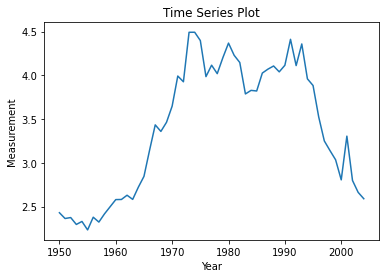

In [93]:
# Time Series Plot
plt.plot (measureQ3.Year, measureQ3.Measurement)
plt.xlabel ('Year')
plt.ylabel ('Measurement')
plt.title('Time Series Plot')
plt.show()

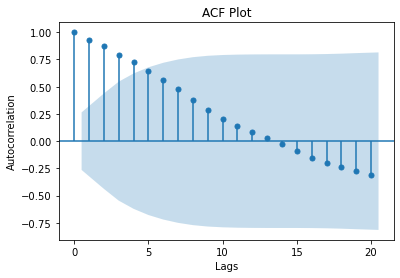

In [94]:
# ACF Plot
tsa.plot_acf(measureQ3.Measurement, lags = 20)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot')
plt.show()

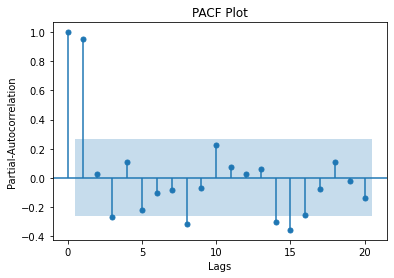

In [95]:
# PACF Plot
tsa.plot_pacf(measureQ3.Measurement, lags=20)
plt.xlabel('Lags')
plt.ylabel('Partial-Autocorrelation') 
plt.title('PACF Plot')
plt.show()

In [96]:
# b) Compute the first difference and plot its ACF and PACF. (6 pts)
#first difference
m3_diff = diff(measureQ3.Measurement)
m3_diff

1    -0.066051
2     0.010941
3    -0.078785
4     0.034196
5    -0.096699
6     0.145162
7    -0.055508
8     0.093885
9     0.081643
10    0.081254
11    0.001387
12    0.048453
13   -0.047440
14    0.139087
15    0.123834
16    0.300088
17    0.288182
18   -0.074626
19    0.104202
20    0.184722
21    0.343738
22   -0.065378
23    0.565260
24    0.000579
25   -0.094974
26   -0.412076
27    0.130620
28   -0.096573
29    0.182569
30    0.166352
31   -0.139356
32   -0.082214
33   -0.359198
34    0.040682
35   -0.006997
36    0.204758
37    0.044996
38    0.035790
39   -0.066893
40    0.074951
41    0.296692
42   -0.300084
43    0.247114
44   -0.398660
45   -0.076133
46   -0.358104
47   -0.275239
48   -0.109680
49   -0.105621
50   -0.229222
51    0.499426
52   -0.506770
53   -0.135470
54   -0.072844
Name: Measurement, dtype: float64

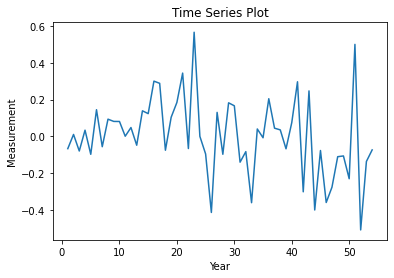

In [97]:
# Time series plot after first differencing 
plt.plot (m3_diff)
plt.xlabel ('Year')
plt.ylabel ('Measurement')
plt.title('Time Series Plot')
plt.show()

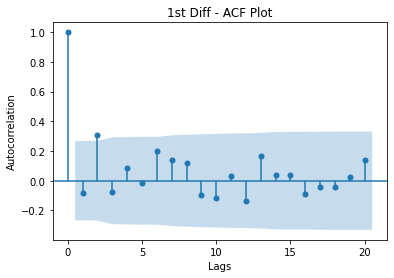

In [98]:
# ACF
tsa.plot_acf(m3_diff, lags = 20)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('1st Diff - ACF Plot')
plt.show()

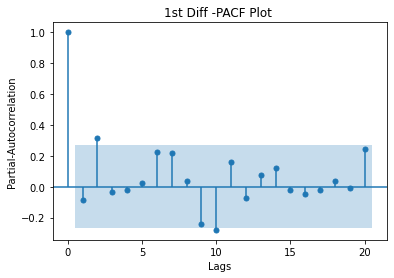

In [99]:
#PACF
tsa.plot_pacf(m3_diff, lags = 20)
plt.xlabel('Lags')
plt.ylabel('Partial-Autocorrelation')
plt.title('1st Diff -PACF Plot ')
plt.show()

(c) Based on the results in (b) above, what model order, i.e. p,d,q in ARMA(p,d,q), would you recommend for the above time series? Provide a justification for your answer. (3 pts)

Answer) ARMA can not be determined directly using ACF and PACF graphs.  <br>
We can determine AR and MA  <br>
ACF tells about MA  <br>
PACF tells about AR <br>
ACF cuts off at lag=2 <br>
PACF cuts off at lag = 2  <br>
Which means: <br>
For MA q=2   <br>
For AR p=2  <br>
d = 1 for both (degree of first differencing) <br>
We represent using ARIMA(p,d,q) <br>
So it can be ARMA(2,1,0) or ARMA(0,1,2) based on considering the fact that we either consider PACF or ACF respectively
